In [1]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import pyerrors as pe

In [2]:
plt.style.use('./base_style.mplstyle')
usetex = matplotlib.checkdep_usetex(True)
plt.rc('text', usetex=usetex)

In this example we look at the analysis of the current quark mass (PCAC mass) on a test gauge field ensemble with fixed Schrödinger functional boundary conditions in the temporal direction.

## Loading data

We can load data from preprocessed files which contains lists of `pyerror` `Obs` and convert them to `Corr` objects as explained in the previous example. We use the parameter `padding` to keep track of the fixed boundary conditions at both temporal ends of the lattice. This allows us to specify absolut temporal positions without having to keep track of any shifts in the data.

In [3]:
p_obs_names = [r'f_A', r'f_P']

p_obs = {}
for i, item in enumerate(p_obs_names):
    tmp_data = pe.input.json.load_json("./data/" + item)
    p_obs[item] = pe.Corr(tmp_data, padding=[1, 1])
    p_obs[item].tag = item

Data has been written using pyerrors 2.0.0.
Format version 0.1
Written by fjosw on 2022-01-06 11:27:27 +0100 on host XPS139305, Linux-5.11.0-44-generic-x86_64-with-glibc2.29

Description:  SF correlation function f_A on a test ensemble
Data has been written using pyerrors 2.0.0.
Format version 0.1
Written by fjosw on 2022-01-06 11:27:34 +0100 on host XPS139305, Linux-5.11.0-44-generic-x86_64-with-glibc2.29

Description:  SF correlation function f_P on a test ensemble


We can now use the method `Corr.show` to have a quick look at the data we just read in 

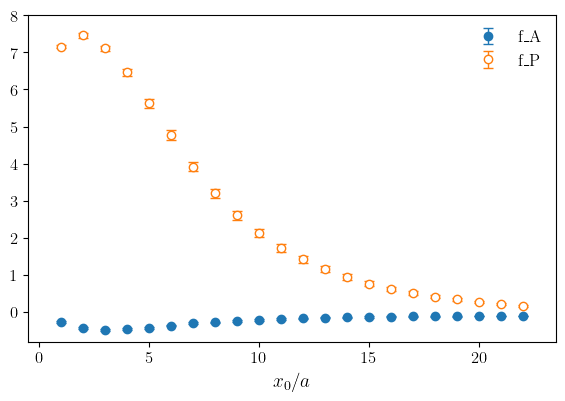

In [4]:
p_obs['f_A'].show(comp=p_obs['f_P'], y_range=[-0.8, 8])

## Constructing the PCAC mass

The PCAC mass is defined as
\begin{align*}
am(x_0)=\frac{a\tilde{\partial}_0 f_\mathrm{A}(x_0)+a^2c_\mathrm{A}\partial_0^{\ast}\partial_0^{}f_\mathrm{P}(x_0)}{2f_\mathrm{P}(x_0)}+\mathrm{O}(a^2)\,.
\end{align*}

We now need to obtain the first derivative of f_A and the second derivative of f_P

In [5]:
first_deriv_fA = p_obs['f_A'].deriv()
first_deriv_fA.tag = r"First derivative of f_A"

In [6]:
second_deriv_fP = p_obs['f_P'].second_deriv()
second_deriv_fP.tag = r"Second derivative of f_P"

We can use these to obtain the unimproved PCAC mass:

In [7]:
am_pcac = first_deriv_fA / 2 / p_obs['f_P']
am_pcac.gamma_method()
am_pcac.tag = "Unimproved PCAC mass"

And with the inclusion of the improvement coefficient $c_\mathrm{A}$ also the $\mathrm{O}(a)$ improved PCAC mass:

In [8]:
cA = -0.03888694628624465
am_pcac_impr = (first_deriv_fA + cA * second_deriv_fP) / 2 / p_obs['f_P']
am_pcac_impr.gamma_method()
am_pcac_impr.tag = "Improved PCAC mass"

We can take a look at the time dependence of the PCAC mass with the method `Corr.show`:

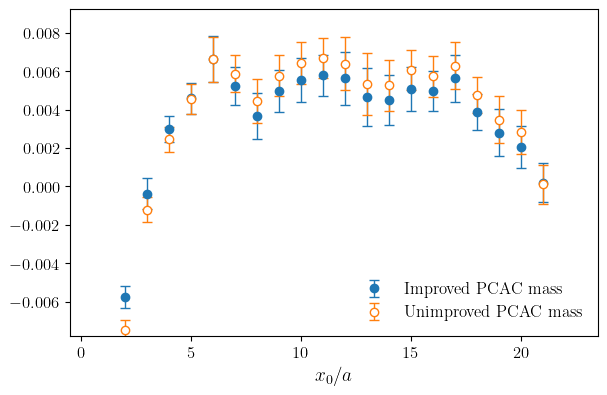

In [9]:
am_pcac_impr.show(comp=am_pcac)

## Plateau values

We can now construct a plateau as a derived observable from the masses.

In [10]:
pcac_plateau = am_pcac_impr.plateau([7, 16])  # We manually specify the plateau range here
pcac_plateau.gamma_method()
pcac_plateau.details()

Fit with 1 parameters
Method: Levenberg-Marquardt
`ftol` termination condition is satisfied.
chisquare/d.o.f.: 0.2704765091136813
Result	 5.03431904e-03 +/- 5.38835422e-04 +/- 8.24919899e-05 (10.703%)
 t_int	 5.15384615e-01 +/- 1.25000000e-01 S = 2.00
64 samples in 1 ensemble:
  · Ensemble 'test_ensemble' : 64 configurations (from 1 to 64)


We can now plot the data with the two plateaus

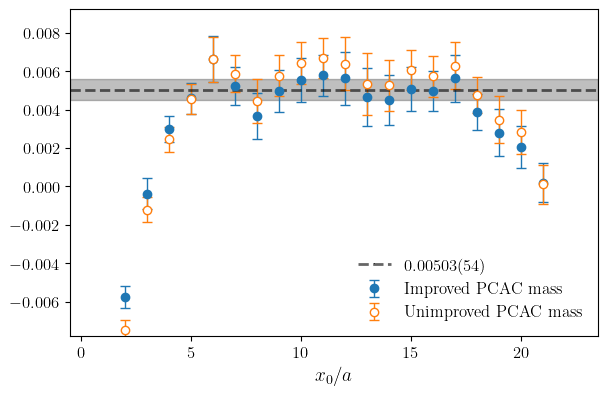

In [11]:
am_pcac_impr.show(comp=am_pcac, plateau=pcac_plateau)

The Monte Carlo history of the observable can be accessed with `plot_history` to identify possible outliers or have a look at the shape of the distribution

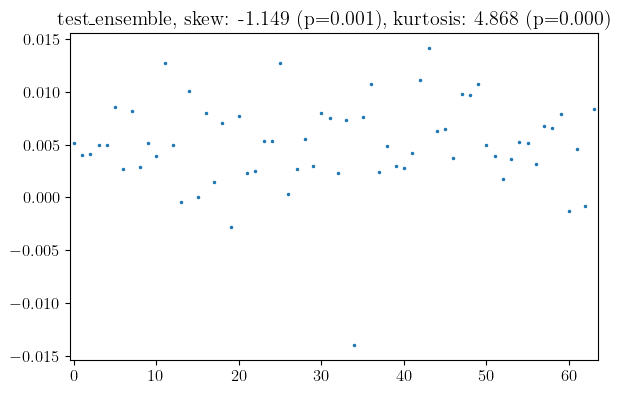

In [12]:
pcac_plateau.plot_history()

If everything is satisfactory we can save the `Obs` in a file for future use. The `Obs` `pcac_plateau` conatains all relevant information for any follow up analyses.

In [13]:
pcac_plateau.tag = "O(a) improved PCAC mass extracted on the test ensemble"
pcac_plateau.dump("pcac_plateau_test_ensemble", datatype="json.gz")